## Observations and Insights 

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how="inner", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Checking the number of mice.
mouse_count = combined_df["Mouse ID"].count()
mouse_count

1893

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicates = combined_df[combined_df.duplicated(["Mouse ID",])]
all_duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1


In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df.drop_duplicates("Mouse ID")
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [20]:
# Checking the number of mice in the clean DataFrame.
second_mouse_count = clean_df["Mouse ID"].count()
second_mouse_count

249

## Summary Statistics

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
standard_dev = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame({
    "Mean": mean,
    "Median": median, 
    "Variance": variance,
    "Standard Deviation": standard_dev,
    "SEM": sem
})

summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [23]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = combined_df['Tumor Volume (mm3)'].mean()
median = combined_df['Tumor Volume (mm3)'].median()
variance = combined_df['Tumor Volume (mm3)'].var()
std = combined_df['Tumor Volume (mm3)'].std()
sem = combined_df['Tumor Volume (mm3)'].sem()
# Using the aggregation method, produce the same summary statistics in a single line
agregate_df = {'Tumor Mean': [mean], 'Tumor Median': [median], 'Tumor Variance': [variance], 'Tumor STD': [std], 'Tumor Sem': [sem]}
new_agregate_df = pd.DataFrame(data=agregate_df)
new_agregate_df.head()

,Tumor Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor Sem
0,50.448381,48.951474,79.116074,8.894722,0.204436


## Bar and Pie Charts

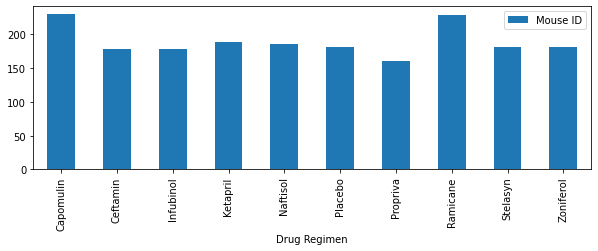

In [24]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_data = pd.DataFrame(combined_df.groupby(["Drug Regimen"]).count()).reset_index()
drugs_df = drug_data[["Drug Regimen", "Mouse ID"]]
drugs_df = drugs_df.set_index("Drug Regimen")

drugs_df.plot(kind="bar", figsize=(10,3))
plt.show()

Text(0, 0.5, 'Count')

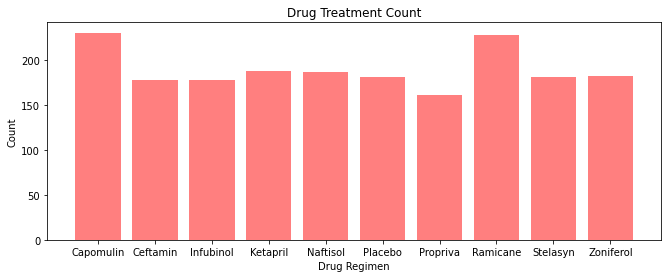

In [30]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
drugs_list = summary_df.index.tolist()
drug_count = (combined_df.groupby(["Drug Regimen"])["Age_months"].count()).tolist()

x_axis = np.arange(len(drug_count))
x_axis = drugs_list
plt.figure(figsize=(11,4))
plt.bar(x_axis, drug_count, color="red", alpha=0.5, align="center")

plt.title("Drug Treatment Count")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

Text(0, 0.5, '')

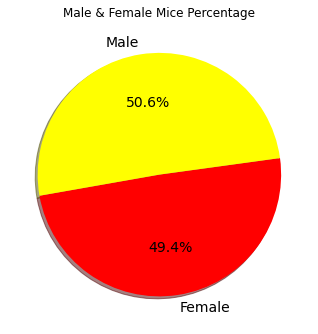

In [50]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = pd.DataFrame(combined_df.groupby(["Sex"]).count()).reset_index()
mice_gender_df = mice_gender_df[["Sex","Mouse ID"]]

plt.figure(figsize=(12,6))
ax = plt.subplot(121, aspect="equal")
mice_gender_df.plot(kind="pie", y = "Mouse ID", ax=ax, autopct='%1.1f%%',
              startangle=190, shadow=True, labels=mice_gender_df["Sex"], legend = False, colors=["red","yellow"], fontsize=14)

plt.title("Male & Female Mice Percentage")
plt.xlabel("")
plt.ylabel("")


(-1.168554778187085,
 1.1046347624021708,
 -1.2267182048220846,
 1.1096662105117718)

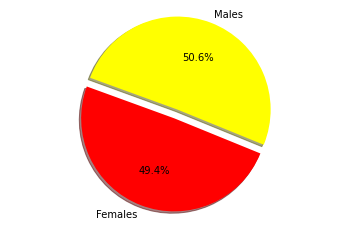

In [51]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count = (combined_df.groupby(["Sex"])["Age_months"].count()).tolist()

# pie chart details
labels = ["Females", "Males"]
colors = ["red", "yellow"]
explode = (0.1, 0)

#piechart w/ pypolt
plt.pie(gender_count, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=160)
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [55]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
drugs_list_df = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Capomulin, Ramicane, Infubinol, and Ceftamin
four_drugs = combined_df[combined_df["Drug Regimen"].isin(four_drugs_list)]

# Start by getting the last (greatest) timepoint for each mouse
last_tumor=four_drugs[four_drugs['Timepoint']==four_drugs['Timepoint'].max()]
merged_last_df = pd.merge(last_tumor, combined_df, on=["Timepoint", "Mouse ID"], how="inner")
del merged_last_df["Metastatic Sites_x"]
del merged_last_df["Metastatic Sites_y"]
del merged_last_df["Drug Regimen_y"]
del merged_last_df["Sex_y"]
del merged_last_df["Age_months_y"]
del merged_last_df["Weight (g)_y"]
del merged_last_df["Tumor Volume (mm3)_y"]

merged_last_df = merged_last_df.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", "Age_months_x":"Age in Months",
                                               "Weight(g)_x": "Weight (g)", "Tumor Volume (mm3)_x": "Tumor Volume (mm3)"})
merged_last_df
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_last_df = merged_last_df.rename(columns={"Drug Regimen_x": "Drug Regimen", "Sex_x": "Sex", "Age_months_x":"Age in Months",
                                               "Weight(g)_x": "Weight (g)", "Tumor Volume (mm3)_x": "Tumor Volume (mm3)"})
merged_last_df



,Mouse ID,Drug Regimen,Sex,Age in Months,Weight (g)_x,Timepoint,Tumor Volume (mm3)
0,k403,Ramicane,Male,21,16,45,22.050126
1,s185,Capomulin,Female,3,17,45,23.343598
2,x401,Capomulin,Female,16,15,45,28.484033
3,m601,Capomulin,Male,22,17,45,28.430964
4,g791,Ramicane,Male,11,16,45,29.128472
...,...,...,...,...,...,...,...
58,x822,Ceftamin,Male,3,29,45,61.386660
59,y163,Infubinol,Female,17,27,45,67.685569
60,y769,Ceftamin,Female,6,27,45,68.594745
61,y865,Ceftamin,Male,23,26,45,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
 

# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 

# for mouse weight and average tumor volume for the Capomulin regimen
